In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('labeled_abortion_full.csv') #fully labeled abortion tweets
data.shape

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/3230905745.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('labeled_abortion_full.csv')


(178807, 12)

In [ ]:
data['stance'].value_counts()

NEUTRAL    94262
AGAINST    43095
FAVOR      20772
OFF        20237
ERROR        441
Name: stance, dtype: int64

In [ ]:
#only use tweets that are considered as pro or anti by ChatGPT
select = ['AGAINST','FAVOR']
data = data.loc[data['stance'].isin(select)]
data.shape

(63867, 12)

In [ ]:
data['stance'].value_counts()

AGAINST    43095
FAVOR      20772
Name: stance, dtype: int64

In [ ]:
data.head()

,username,content,id,userid,replyCount,retweetCount,likeCount,quoteCount,date,label,stance,clean_content
0,ACLUWYO,"Regardless of what the courts say, abortion is...",1.537586e+18,2.108832e+08,0.0,0.0,1.0,0.0,2022-06-17 00:00:03+00:00,0,FAVOR,"Regardless of what the courts say , abortion i..."
1,ACLUSouthDakota,"Regardless of what the courts say, abortion is...",1.537586e+18,4.735377e+07,1.0,3.0,4.0,0.0,2022-06-17 00:00:04+00:00,0,FAVOR,"Regardless of what the courts say , abortion i..."
2,AbortionFront,Do you want your abortion activist tool belt t...,1.537586e+18,2.906764e+09,0.0,2.0,3.0,0.0,2022-06-17 00:00:15+00:00,0,FAVOR,Do you want your abortion activist tool belt t...
3,ACLUNorthDakota,"Regardless of what the courts say, abortion is...",1.537586e+18,3.974575e+08,0.0,0.0,2.0,0.0,2022-06-17 00:00:22+00:00,0,FAVOR,"Regardless of what the courts say , abortion i..."
4,hotjugsbev3,@Meremer85248339 @SVH2 Editing a tweet to proc...,1.537586e+18,1.353583e+18,0.0,0.0,0.0,0.0,2022-06-17 00:01:04+00:00,0,FAVOR,Editing a tweet to proclaim your control over ...


In [ ]:
data.to_csv('abortion_pro_anti.csv',index=False,encoding='utf-8-sig')

In [ ]:
data.reset_index(drop=True, inplace=True)

### sentiment analysis
use sentiment polarity score to represent the intensity of opinion

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


data['sentiment'] = data['content'].apply(lambda x: analyser.polarity_scores(x)['compound'])
data['abs_sentiment'] = data['sentiment'].abs()
data.head(20)

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/2017327672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['content'].apply(lambda x: analyser.polarity_scores(x)['compound'])
/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/2017327672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abs_sentiment'] = data['sentiment'].abs()


,username,content,id,userid,replyCount,retweetCount,likeCount,quoteCount,date,label,stance,clean_content,sentiment,abs_sentiment
0,ACLUWYO,"Regardless of what the courts say, abortion is...",1.537586e+18,2.108832e+08,0.0,0.0,1.0,0.0,2022-06-17 00:00:03+00:00,0,FAVOR,"Regardless of what the courts say , abortion i...",0.8175,0.8175
1,ACLUSouthDakota,"Regardless of what the courts say, abortion is...",1.537586e+18,4.735377e+07,1.0,3.0,4.0,0.0,2022-06-17 00:00:04+00:00,0,FAVOR,"Regardless of what the courts say , abortion i...",0.8175,0.8175
2,AbortionFront,Do you want your abortion activist tool belt t...,1.537586e+18,2.906764e+09,0.0,2.0,3.0,0.0,2022-06-17 00:00:15+00:00,0,FAVOR,Do you want your abortion activist tool belt t...,0.8320,0.8320
3,ACLUNorthDakota,"Regardless of what the courts say, abortion is...",1.537586e+18,3.974575e+08,0.0,0.0,2.0,0.0,2022-06-17 00:00:22+00:00,0,FAVOR,"Regardless of what the courts say , abortion i...",0.8175,0.8175
4,hotjugsbev3,@Meremer85248339 @SVH2 Editing a tweet to proc...,1.537586e+18,1.353583e+18,0.0,0.0,0.0,0.0,2022-06-17 00:01:04+00:00,0,FAVOR,Editing a tweet to proclaim your control over ...,0.9186,0.9186
5,WeArePatriots2,"I’m attending Field Team 6’s event, “Abortion ...",1.537586e+18,4.646097e+07,0.0,0.0,0.0,0.0,2022-06-17 00:01:07+00:00,0,FAVOR,"I ’ m attending Field Team 6 ’ s event , “ Abo...",0.4184,0.4184
6,lousrant,"Like Trump, @GovDeSantis is a wannabe dictator...",1.537587e+18,8.628851e+08,0.0,0.0,1.0,0.0,2022-06-17 00:04:14+00:00,1,AGAINST,"Like Trump , is a wannabe dictator .. So far ,...",-0.8020,0.8020
7,pupusafemme,If I get sued by some anti-abortion Texan for ...,1.537587e+18,8.248562e+17,0.0,0.0,7.0,0.0,2022-06-17 00:04:35+00:00,0,FAVOR,If I get sued by some anti-abortion Texan for ...,0.6808,0.6808
8,ChattahoocheeJB,@ReverendWarnock #pastorplatitude the false pr...,1.537587e+18,7.507799e+07,0.0,0.0,1.0,0.0,2022-06-17 00:05:12+00:00,1,AGAINST,#pastorplatitude the false prophet doesn't hav...,0.5994,0.5994
9,WickAbortions,@Constance_1844 Pregnancies have consequences:...,1.537587e+18,1.364668e+18,1.0,1.0,7.0,0.0,2022-06-17 00:05:42+00:00,0,FAVOR,Pregnancies have consequences : Abortion .,0.0000,0.0000


In [ ]:
data['stance_score'] = 0

data['stance_score'].loc[data['stance']=='FAVOR'] = 1
data['stance_score'].loc[data['stance']=='AGAINST'] = -1
data['stance_score'].value_counts()

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/2993944898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stance_score'] = 0
/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/2993944898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stance_score'].loc[data['stance']=='FAVOR'] = 1
/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/2993944898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

-1    43095
 1    20772
Name: stance_score, dtype: int64

stance leaning is defined as the product of stance score and absolute sentiment score.

stance leaning = stance * abs(sentiment)

In [ ]:
data['stance_leaning'] = data['abs_sentiment']*data['stance_score']
data.head()

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/1848220387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stance_leaning'] = data['abs_sentiment']*data['stance_score']


,username,content,id,userid,replyCount,retweetCount,likeCount,quoteCount,date,label,stance,clean_content,sentiment,abs_sentiment,stance_score,stance_leaning
0,ACLUWYO,"Regardless of what the courts say, abortion is...",1.537586e+18,2.108832e+08,0.0,0.0,1.0,0.0,2022-06-17 00:00:03+00:00,0,FAVOR,"Regardless of what the courts say , abortion i...",0.8175,0.8175,1,0.8175
1,ACLUSouthDakota,"Regardless of what the courts say, abortion is...",1.537586e+18,4.735377e+07,1.0,3.0,4.0,0.0,2022-06-17 00:00:04+00:00,0,FAVOR,"Regardless of what the courts say , abortion i...",0.8175,0.8175,1,0.8175
2,AbortionFront,Do you want your abortion activist tool belt t...,1.537586e+18,2.906764e+09,0.0,2.0,3.0,0.0,2022-06-17 00:00:15+00:00,0,FAVOR,Do you want your abortion activist tool belt t...,0.8320,0.8320,1,0.8320
3,ACLUNorthDakota,"Regardless of what the courts say, abortion is...",1.537586e+18,3.974575e+08,0.0,0.0,2.0,0.0,2022-06-17 00:00:22+00:00,0,FAVOR,"Regardless of what the courts say , abortion i...",0.8175,0.8175,1,0.8175
4,hotjugsbev3,@Meremer85248339 @SVH2 Editing a tweet to proc...,1.537586e+18,1.353583e+18,0.0,0.0,0.0,0.0,2022-06-17 00:01:04+00:00,0,FAVOR,Editing a tweet to proclaim your control over ...,0.9186,0.9186,1,0.9186


In [ ]:
data.to_csv('abortion_leaning_score.csv',index=False,encoding='utf-8-sig')

### average by users

In [ ]:
#group by users and average tweets leaning for each user -- personal individual leaning
avg_score = data.groupby('username').agg({'stance_leaning':'mean'}).reset_index().rename(columns={'stance_leaning':'avg_leaning'})
avg_score.head()

,username,avg_leaning
0,00075Guy,-0.542900
1,007mss,-0.354250
2,00_JR_00,-0.692662
3,011349,-0.184900
4,01Abhishesh,0.127267


In [ ]:
len(avg_score)

11305

<AxesSubplot:>

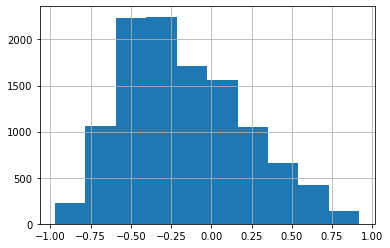

In [ ]:
avg_score['avg_leaning'].hist()

In [ ]:
avg_score.to_csv('avg_leaning.csv',index=False)

### plot

In [ ]:
users = pd.read_csv('following_clean.csv')
users.head()

,username,id,following,clean_following,following_count
0,1980srock,7.188956e+17,"['gag_canada', 'joepatrick85', 'dr_wholeah', '...","['tweettruth2me', 'bennyjohnson', 'stillgray',...",8
1,marylou_quayle,7.556195e+17,"['hughbramlett', 'shawn_farash', 'drefanzor', ...","['stillgray', 'mtracey', 'caitoz', 'cat_barnes...",20
2,hemingquay,7.876231e+08,"['mkieloch', 'punishednrx', '_evelynrae', 'swa...","['prolifejewess', 'just_mindy', 'davidharsanyi...",14
3,aamiramin885,4.350256e+09,"['kriti_official', 'benchmarkemail', 'nudgecoa...",[],0
4,Vandalay_Inc,8.279382e+17,"['bestofdyingtwit', 'mahamed45049766', 'mosesh...","['kittysundae', 'academic_la', 'thedailybeast'...",13


In [ ]:
users = users.loc[users['following_count']!=0]
len(users)

10163

In [ ]:
users = users.merge(avg_score, left_on='username', right_on='username', how='inner')
users.head()

,username,id,following,clean_following,following_count,avg_leaning
0,1980srock,7.188956e+17,"['gag_canada', 'joepatrick85', 'dr_wholeah', '...","['tweettruth2me', 'bennyjohnson', 'stillgray',...",8,-0.377271
1,marylou_quayle,7.556195e+17,"['hughbramlett', 'shawn_farash', 'drefanzor', ...","['stillgray', 'mtracey', 'caitoz', 'cat_barnes...",20,-0.805080
2,hemingquay,7.876231e+08,"['mkieloch', 'punishednrx', '_evelynrae', 'swa...","['prolifejewess', 'just_mindy', 'davidharsanyi...",14,-0.163700
3,Vandalay_Inc,8.279382e+17,"['bestofdyingtwit', 'mahamed45049766', 'mosesh...","['kittysundae', 'academic_la', 'thedailybeast'...",13,-0.480517
4,DTorstensond,1.293988e+18,"['marcel_safari96', 'theopticqueer', 'nycforab...","['nycforabortion', 'taliaotg', 'ybarrap', 'nan...",60,0.531656


In [ ]:
len(users)

9555

In [ ]:
def parse_following_string(s):
    s = s[1:len(s) - 2]
    ids = []
    for id in s.split(', '):
        if id != '':
            ids.append(id.strip("''"))
    return ids

In [ ]:
users['clean_following'] = users['clean_following'].apply(lambda x: parse_following_string(x))
users.head()

,username,id,following,clean_following,following_count,avg_leaning
0,1980srock,7.188956e+17,"['gag_canada', 'joepatrick85', 'dr_wholeah', '...","[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271
1,marylou_quayle,7.556195e+17,"['hughbramlett', 'shawn_farash', 'drefanzor', ...","[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080
2,hemingquay,7.876231e+08,"['mkieloch', 'punishednrx', '_evelynrae', 'swa...","[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700
3,Vandalay_Inc,8.279382e+17,"['bestofdyingtwit', 'mahamed45049766', 'mosesh...","[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517
4,DTorstensond,1.293988e+18,"['marcel_safari96', 'theopticqueer', 'nycforab...","[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656


In [ ]:
#calculate following leaning
#following leaning of a user is the average of individual leaning from the user's following list
users['following leaning'] = None

for i in range(len(users)):
    lst = users['clean_following'].iloc[i]
    users['following leaning'].iloc[i] = avg_score['avg_leaning'].loc[avg_score['username'].isin(lst)].mean()

users.head()

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_48409/1415307510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['following leaning'].iloc[i] = avg_score['avg_leaning'].loc[avg_score['username'].isin(lst)].mean()


,username,id,following,clean_following,following_count,avg_leaning,following leaning
0,1980srock,7.188956e+17,"['gag_canada', 'joepatrick85', 'dr_wholeah', '...","[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093
1,marylou_quayle,7.556195e+17,"['hughbramlett', 'shawn_farash', 'drefanzor', ...","[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663
2,hemingquay,7.876231e+08,"['mkieloch', 'punishednrx', '_evelynrae', 'swa...","[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355
3,Vandalay_Inc,8.279382e+17,"['bestofdyingtwit', 'mahamed45049766', 'mosesh...","[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269
4,DTorstensond,1.293988e+18,"['marcel_safari96', 'theopticqueer', 'nycforab...","[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835


In [ ]:
users.dropna(subset=['following leaning'],inplace=True)

Detect Echo Chamber

In echo chamber, users are surrounded with like-minded users, or in other words, individual leaning is positively corrected with following leaning

/Users/Joyce/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


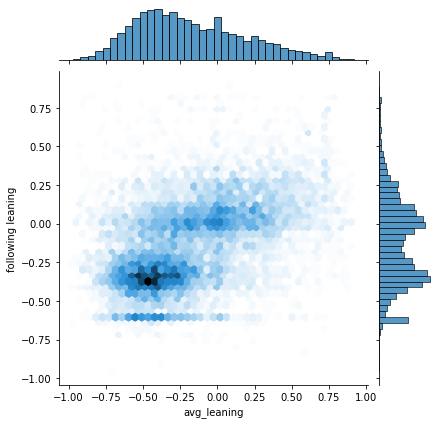

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(users['avg_leaning'], users['following leaning'],kind='hex')
plt.show()

In [ ]:
len(users)

9486

In [ ]:
from scipy import stats

corr, p = stats.spearmanr(users['avg_leaning'], users['following leaning'])
print(corr)
print(p)

0.47802082439269766
0.0


In [ ]:
users.drop(columns=['following'],inplace=True)
users.head()

,username,id,clean_following,following_count,avg_leaning,following leaning
0,1980srock,7.188956e+17,"[tweettruth2me, bennyjohnson, stillgray, thebl...",8,-0.377271,-0.288093
1,marylou_quayle,7.556195e+17,"[stillgray, mtracey, caitoz, cat_barnes30, mrd...",20,-0.805080,-0.264663
2,hemingquay,7.876231e+08,"[prolifejewess, just_mindy, davidharsanyi, jim...",14,-0.163700,-0.334355
3,Vandalay_Inc,8.279382e+17,"[kittysundae, academic_la, thedailybeast, snop...",13,-0.480517,-0.108269
4,DTorstensond,1.293988e+18,"[nycforabortion, taliaotg, ybarrap, nanwhaley,...",60,0.531656,0.098835


In [ ]:
users.shape

(9486, 6)

In [ ]:
users.to_csv('users_plot.csv',index=False)